# Neural Network Classifier - QNN -Sampler - DGA Botnet detection

Madjid Tehrani
Cybersec-DMS (DMS GmbH)
#https://www.cybersec-dms.com/
Copyright © 2023, DMS GmbH. All rights reserved. Permission is hereby granted, free of charge, to any person obtaining a copy of this
software and associated documentation files (the "Software"), for academic research purposes, subject to the following conditions:
the above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.   


In [ ]:
!pip install -U azure-quantum
!pip install -U azure-quantum[qiskit]
!pip install -U qiskit_machine_learning
!pip install pylatexenc
!pip install qiskit --upgrade;
!pip install qiskit-aer;
!pip install qiskit-terra;
!pip install qiskit-machine-learning;

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit import QuantumCircuit, execute, Aer
from qiskit import *
from qiskit.utils import QuantumInstance
from azure.quantum import Workspace

provider = AzureQuantumProvider (
    resource_id = "/subscriptions/yourID/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/yourWorkspace",
    location = "eastus"
)

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

workspace = Workspace (
    subscription_id = "yourID",
    resource_group = "AzureQuantum",
    name = "yourWorkspace",
    location = "eastus"

)

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot this issue.


This workspace's targets:


To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code FKHLNU5RF to authenticate.
- ionq.simulator
- ionq.simulator
- ionq.simulator
- ionq.qpu
- ionq.qpu
- ionq.qpu
- ionq.qpu.aria-1
- ionq.qpu.aria-1
- ionq.qpu.aria-1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s1-apival
- quantinuum.sim.h1-1sc
- quantinuum.sim.h1-1sc
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s2-apival
- quantinuum.sim.h1-2sc
- quantinuum.sim.h1-2sc
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s1-sim
- quantinuum.sim.h1-1e
- quantinuum.sim.h1-1e
- quantinuum.hqs-lt-s2-sim
- quantinuum.hqs-lt-s2-sim
- quantinuum.sim.h1-2e
- quantinuum.sim.h1-2e
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1
- quantinuum.qpu.h1-1
- quantinuum.qpu.h1-1
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2
- quantinuum.qpu.h1-2
- quantinuum.qpu.h1-2
- rigetti.sim.qvm
- rigetti.qpu.aspen-m-3
- microsoft.estimator


In [ ]:
# Create IonQ simulator and QPU backends
ionq_simulator_backend = provider.get_backend("ionq.simulator")
ionq_qpu_backend = provider.get_backend("ionq.qpu")

# Create Rigetti simulator and QPU backends
rigetti_simulator_backend = provider.get_backend("rigetti.sim.qvm")
rigetti_qpu_backend = provider.get_backend("rigetti.qpu.aspen-m-3")

# Create Quantinuum simulator and QPU backends
Quantinuum_simulator_backend = provider.get_backend("quantinuum.sim.h1-2sc")
Quantinuum_qpu_backend = provider.get_backend("quantinuum.qpu.h1-2")

# Create QASM simulator
AER_backend = Aer.get_backend('qasm_simulator')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.algorithms.optimizers import SLSQP, SPSA

from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

<ipython-input-5-6d5833aefcde>:5: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B


In [ ]:
!wget https://aq5efd7d2644dd406cb3ec2d.blob.core.windows.net/dga/BotnetDgaDataset_1000.csv

--2023-08-16 15:51:39--  https://aq5efd7d2644dd406cb3ec2d.blob.core.windows.net/dga/BotnetDgaDataset_1000.csv
Resolving aq5efd7d2644dd406cb3ec2d.blob.core.windows.net (aq5efd7d2644dd406cb3ec2d.blob.core.windows.net)... 52.239.169.4
Connecting to aq5efd7d2644dd406cb3ec2d.blob.core.windows.net (aq5efd7d2644dd406cb3ec2d.blob.core.windows.net)|52.239.169.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75901 (74K) [text/csv]
Saving to: ‘BotnetDgaDataset_1000.csv’

BotnetDgaDataset_10 100%[===================>]  74.12K   167KB/s    in 0.4s    

2023-08-16 15:51:40 (167 KB/s) - ‘BotnetDgaDataset_1000.csv’ saved [75901/75901]



In [ ]:
import csv
import os
import numpy as np
from sklearn.datasets import make_blobs
datafilename="BotnetDgaDataset_1000.csv"
resultname="result_BotnetDgaDataset_QNNEstimator_1000.txt"
cwd=os.getcwd()
mycsv=cwd+"/"+datafilename
print(mycsv)
def load_data(filepath):
    with open(filepath) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = 1000
        n_features = 7
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=int)

        for i, ir in enumerate(data_file):
            data[i] = np.asarray(ir[:-1], dtype=np.float64)
            target[i] = np.asarray(ir[-1], dtype=int)

    return data, target
X, y = load_data(mycsv)
y01=y

/content/BotnetDgaDataset_1000.csv


In [ ]:
num_inputs = 7
num_samples = 50
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2 * y01 - 1  # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1

### Classification with a `SamplerQNN`

Next we show how a `SamplerQNN` can be used for classification within a `NeuralNetworkClassifier`. In this context, the `SamplerQNN` is expected to return $d$-dimensional probability vector as output, where $d$ denotes the number of classes.
The underlying `Sampler` primitive returns quasi-distributions of bit strings and we just need to define a mapping from the measured bitstrings to the different classes. For binary classification we use the parity mapping.

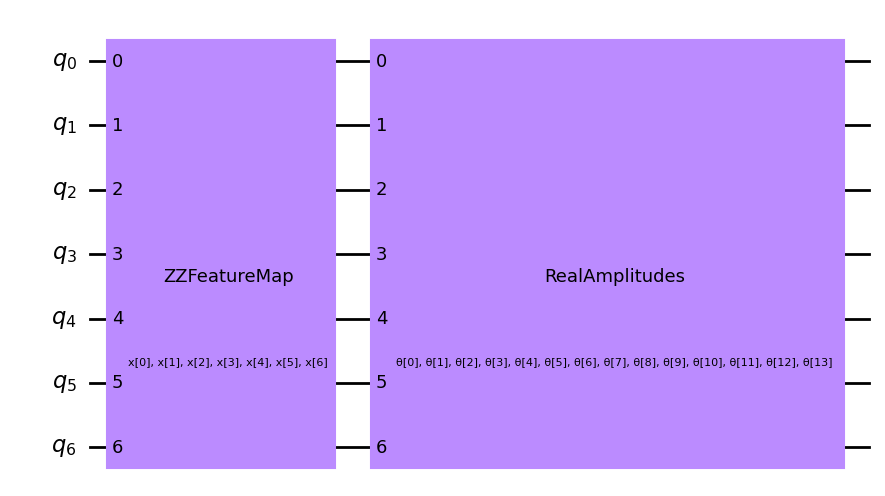

In [ ]:
num_inputs=7
# construct feature map
feature_map = ZZFeatureMap(num_inputs)

# construct ansatz
ansatz = RealAmplitudes(num_inputs, reps=1)

# construct quantum circuit
qc = QuantumCircuit(num_inputs)
qc.append(feature_map, range(num_inputs))
qc.append(ansatz, range(num_inputs))
qc.decompose().draw(output="mpl")

In [ ]:
# parity maps bitstrings to 0 or 1
def parity(x):
    return "{:b}".format(x).count("1") % 2


output_shape = 2  # corresponds to the number of classes, possible outcomes of the (parity) mapping.

In [ ]:
# construct QNN
sampler_qnn = SamplerQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=output_shape,
)

In [ ]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct classifier
sampler_classifier = NeuralNetworkClassifier(
    neural_network=sampler_qnn, optimizer=SPSA(), callback=callback_graph
)

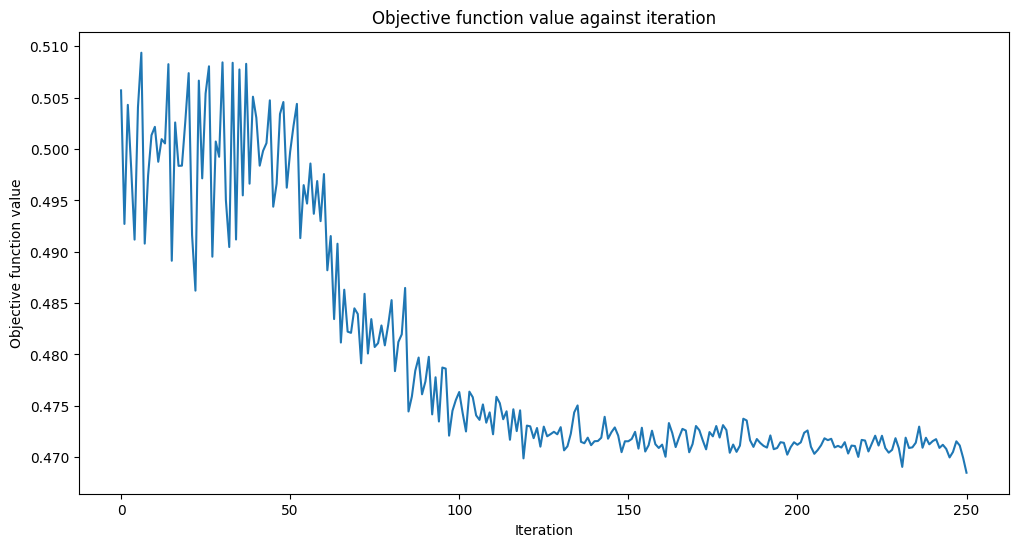

303.93576413899996


In [ ]:
# create empty array for callback to store evaluations of the objective function
import time
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
start_sampler=time.perf_counter()
# fit classifier to data
sampler_classifier.fit(X, y01)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
sampler_classifier.score(X, y01)
finish_sampler=time.perf_counter()
print(finish_sampler-start_sampler)

In [ ]:
sampler_classifier.weights

array([-0.42570314,  0.54631617,  0.14114583,  0.13857145,  0.8129375 ,
        0.70627576, -0.18156495,  1.20010155, -0.29335166, -0.63653078,
        0.17689953,  0.31653801, -0.38844091, -0.99731881])

In [ ]:
print("accuracy of QNN-Sampler=",sampler_classifier.score(X, y01))
print("tims(s) of QNN-Sampler=",finish_sampler-start_sampler)

accuracy of QNN-Sampler= 0.74
tims(s) of QNN-Sampler= 303.93576413899996
